In [ ]:
install.packages('mcmc')
install.packages('mvtnorm')
install.packages('MHadaptive')
library(mcmc)
library(mvtnorm)
library(MHadaptive)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: MASS



# Question 4

[1] 3.4044

[1] 0.3385764

[1] 10.077

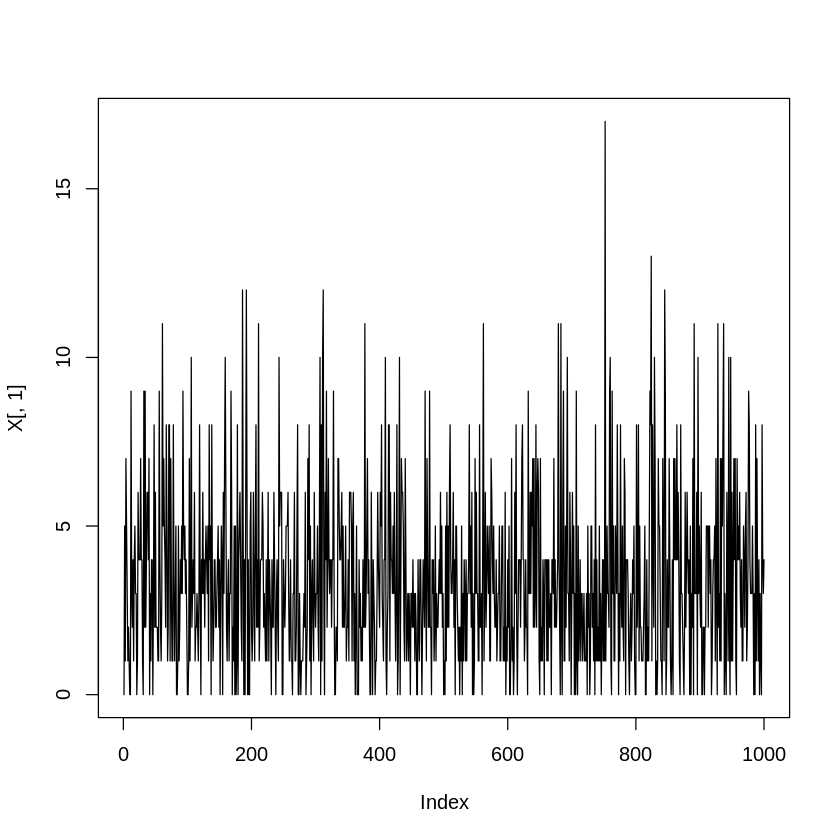

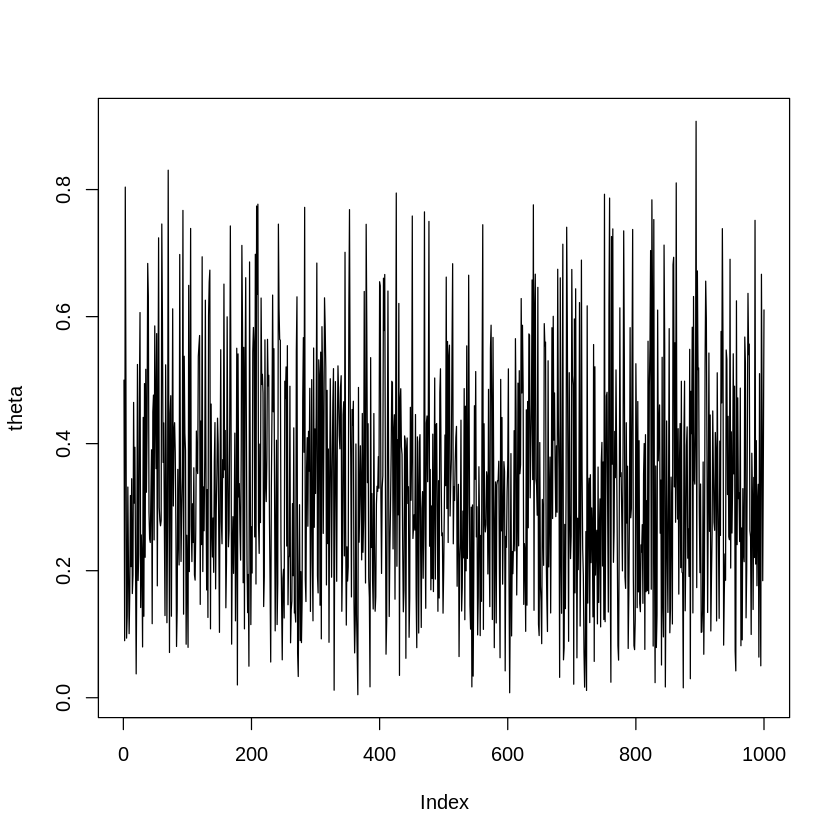

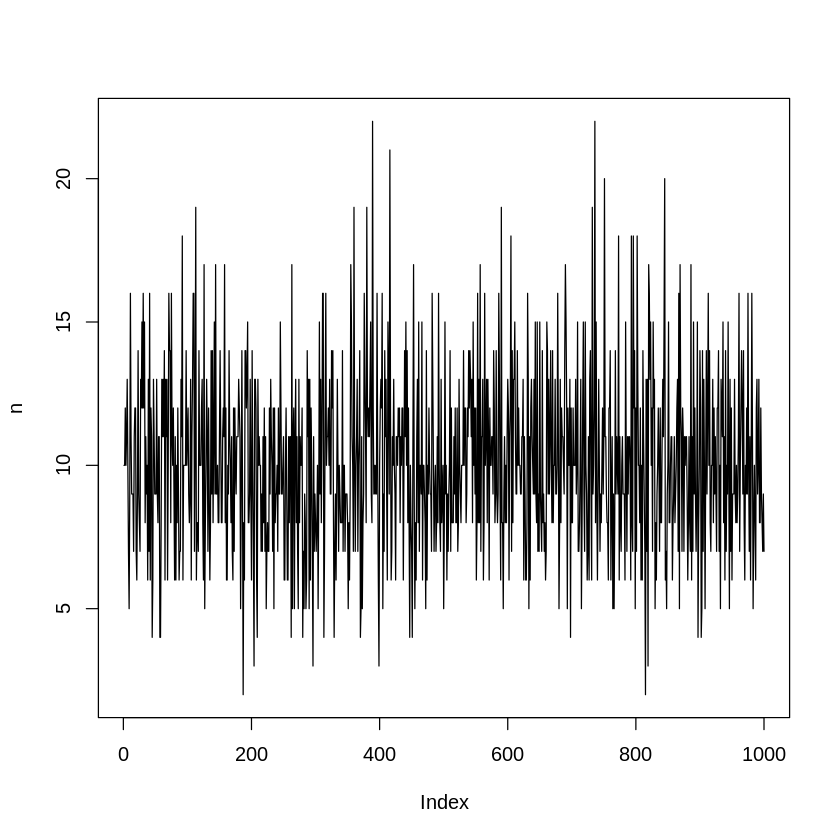

In [ ]:
theta_init = 0.5
n_init = 10

theta = n = c()

X = matrix(0, ncol = x, nrow = S)

S = 1e3
a = 2
b = 4
x = 10
lambda = 10

n[1] = n_init
theta[1] = theta_init

for (iter in 2:S) {
  
  X[iter,] = rbinom(x, size = n[iter - 1], prob = theta[iter - 1])
  theta[iter] = rbeta(1, a, b)
  n[iter] = rpois(1, lambda)

}

mean(X)
mean(theta)
mean(n)

plot(X[,1], type = 'l')
plot(theta, type = 'l')
plot(n, type = 'l')

[1] 3.497

[1] 0.3396649

[1] 10.144

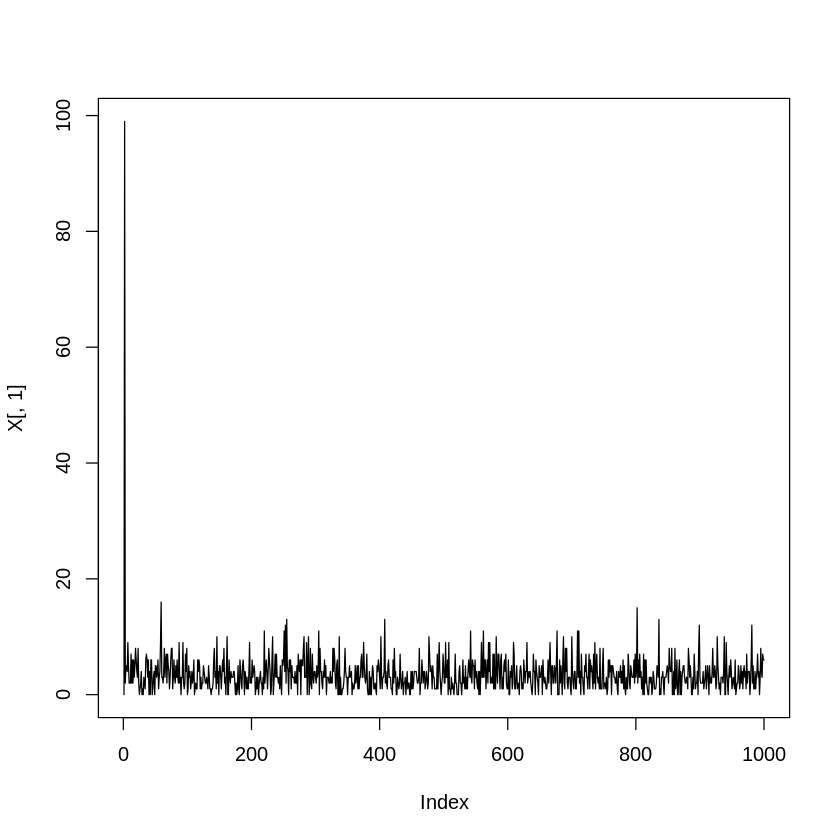

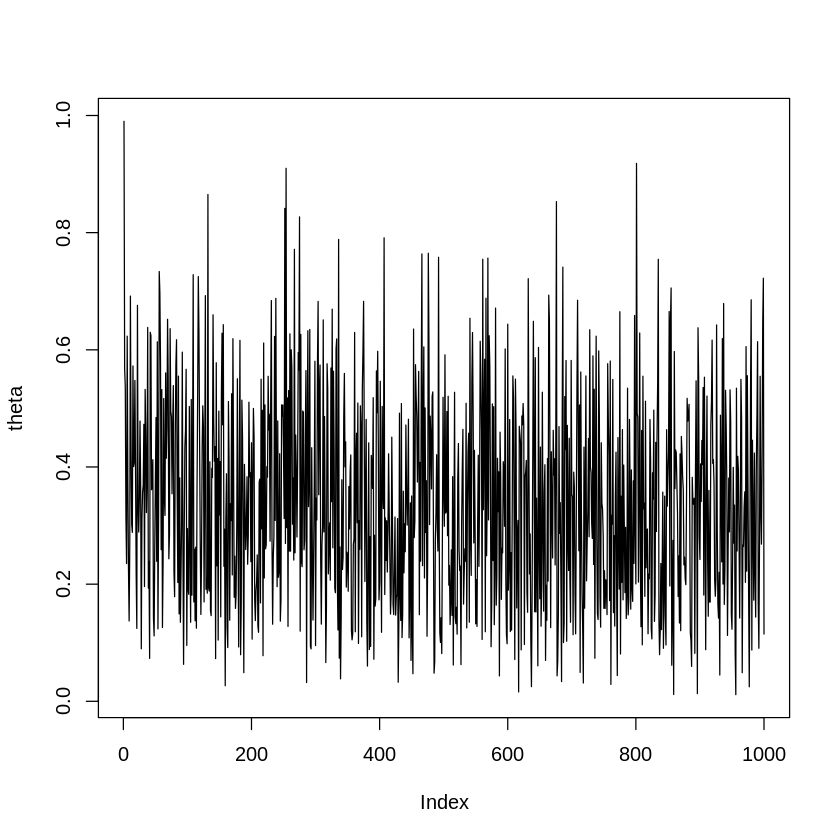

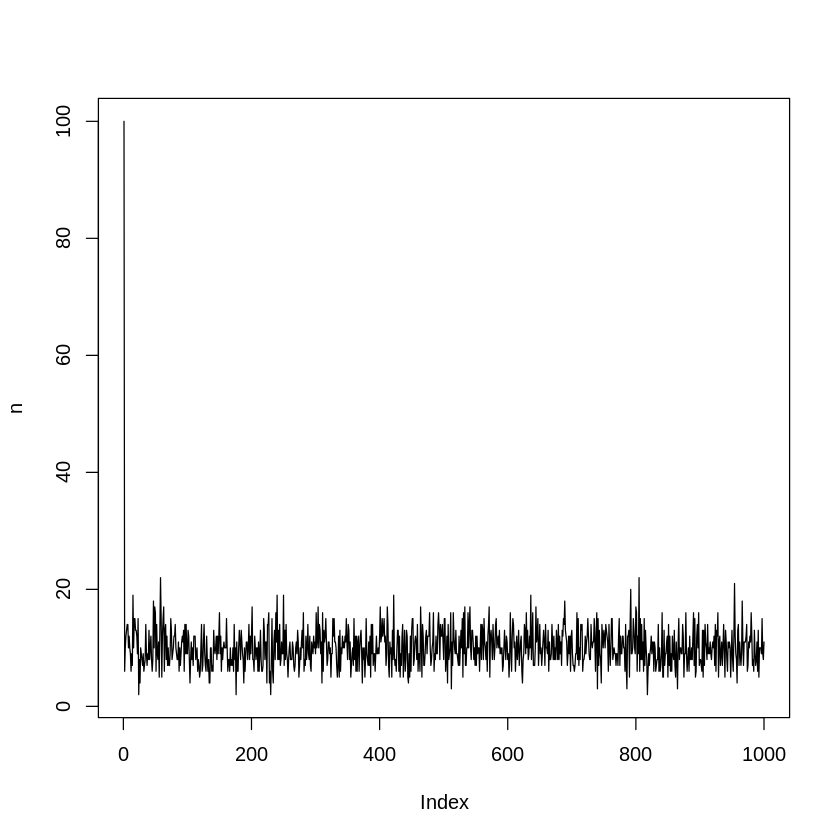

In [ ]:
# changing init
# 2nd chain

theta_init = 0.99
n_init = 100

theta = n = c()

X = matrix(0, ncol = x, nrow = S)

S = 1e3
a = 2
b = 4
x = 10
lambda = 10

n[1] = n_init
theta[1] = theta_init

for (iter in 2:S) {
  
  X[iter,] = rbinom(x, size = n[iter - 1], prob = theta[iter - 1])
  theta[iter] = rbeta(1, a, b)
  n[iter] = rpois(1, lambda)

}

mean(X)
mean(theta)
mean(n)

plot(X[,1], type = 'l')
plot(theta, type = 'l')
plot(n, type = 'l')

[1] 3.3139

[1] 0.3284928

[1] 10.095

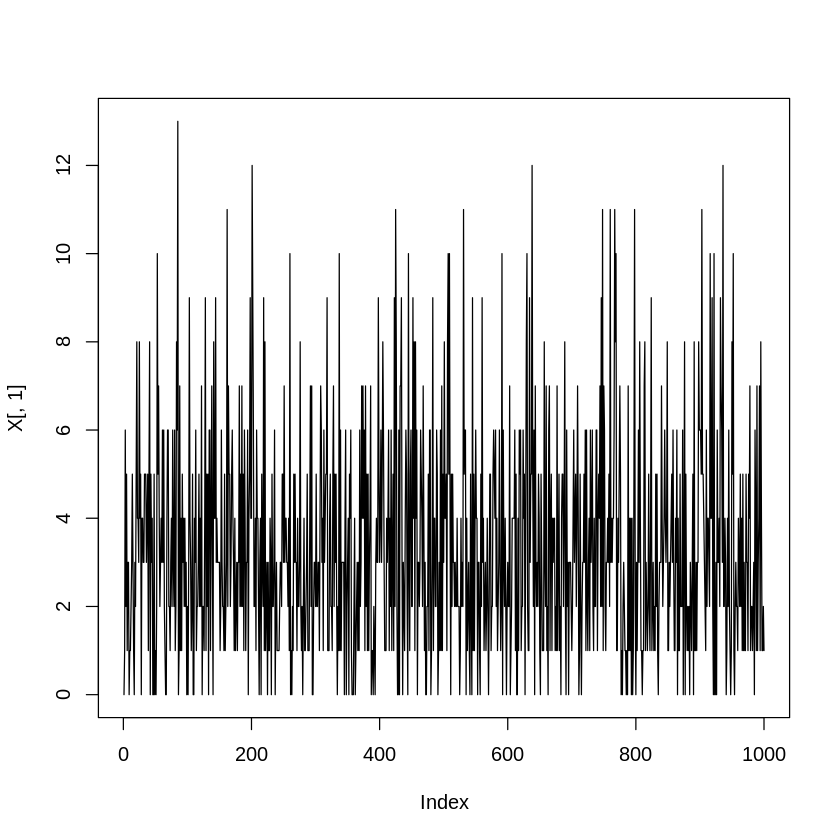

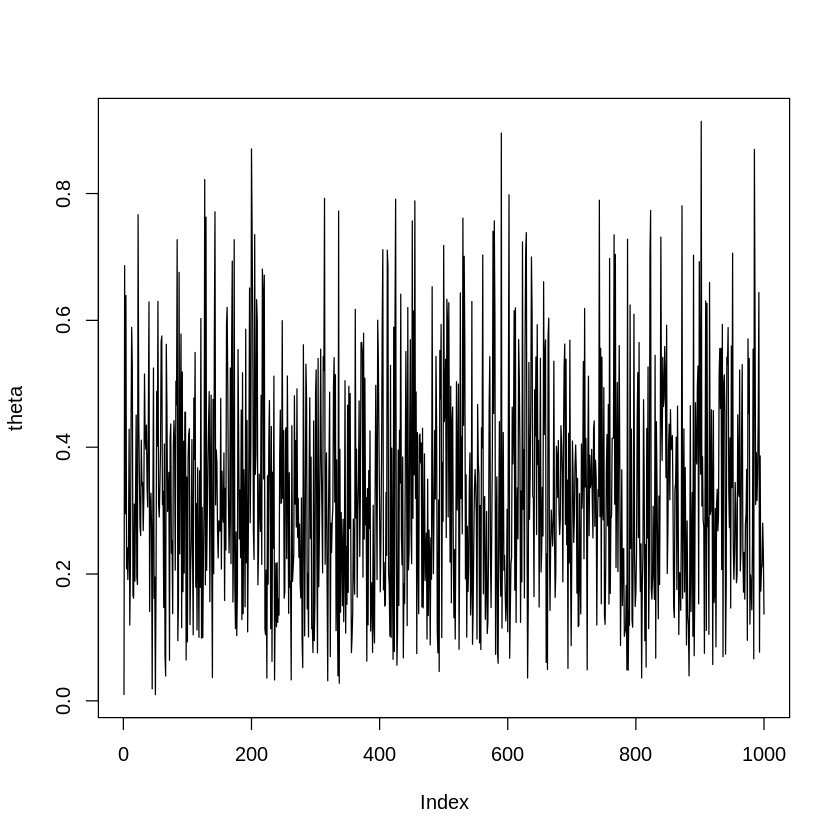

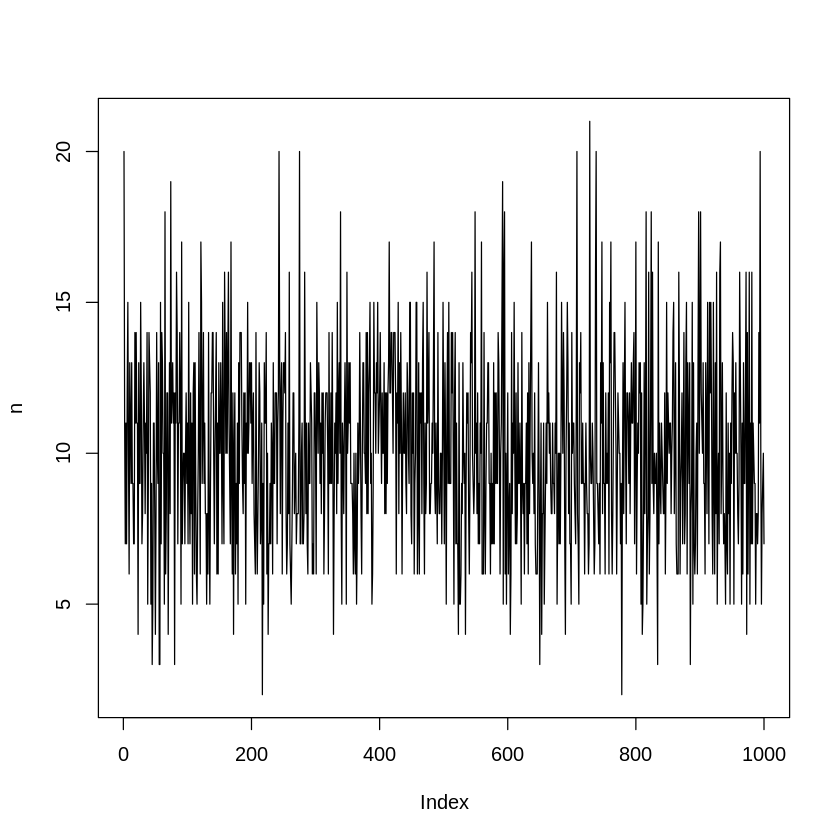

In [ ]:
theta_init = 0.01
n_init = 20

theta = n = c()

X = matrix(0, ncol = x, nrow = S)

S = 1e3
a = 2
b = 4
x = 10
lambda = 10

n[1] = n_init
theta[1] = theta_init

for (iter in 2:S) {
  
  X[iter,] = rbinom(x, size = n[iter - 1], prob = theta[iter - 1])
  theta[iter] = rbeta(1, a, b)
  n[iter] = rpois(1, lambda)

}

mean(X)
mean(theta)
mean(n)

plot(X[,1], type = 'l')
plot(theta, type = 'l')
plot(n, type = 'l')

# Part II

In [ ]:
df = read.csv('poisson_reg.csv', header = T, strip.white = T)
head(df)

,X.Intercept.,math,prog2,prog3,y
,<int>,<int>,<int>,<int>,<int>
1,1,41,0,1,0
2,1,41,0,0,0
3,1,44,0,1,0
4,1,42,0,1,0
5,1,40,0,1,0
6,1,42,0,0,0


In [ ]:
out = glm(df$y ~ . , data = df, family = poisson, x = T)

summary(out)


Call:
glm(formula = df$y ~ ., family = poisson, data = df, x = T)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2043  -0.8436  -0.5106   0.2558   2.6796  

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -5.24712    0.65845  -7.969 1.60e-15 ***
X.Intercept.       NA         NA      NA       NA    
math          0.07015    0.01060   6.619 3.63e-11 ***
prog2         1.08386    0.35825   3.025  0.00248 ** 
prog3         0.36981    0.44107   0.838  0.40179    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 287.67  on 199  degrees of freedom
Residual deviance: 189.45  on 196  degrees of freedom
AIC: 373.5

Number of Fisher Scoring iterations: 6


In [ ]:
hard_code_factorial = function(n) {

  # recursive hardcoded factorial
  ans = 1

  # if 0 or 1
  if ((n==0)|(n==1)) {
    ans = 1
  } else{
    # otherwise
    for(i in 1:n) {
      ans = ans * i
    }   
  }
  ans
}



lu_post_factory = function(x, y) function(lambda) {
  # log likelihood + log prior

  sum = 0
  for (i in 1:length(y)) {
    first = -lambda[i] + y[i] * log(lambda[i]) - log(hard_code_factorial(y[i]))
    # first = -lambda[i] + y[i] * log(lambda[i])
    sum = sum + first
  }

  # sum = sum(dpois(y, lambda, log = T))
  print(sum + prior(lambda))
  sum + prior(lambda)
  
}
prior = function(lambda) {
  rnorm(1, 0, 100)
  # sum(dnorm(lambda, 0, 100))
}

lupost = lu_post_factory(out$x, out$y)

In [ ]:
out = metrop(lupost, initial = 0.5, nbatch = 1e4)

 1 
NA 


ERROR: ignored

Timing stopped at: 0.012 0 0.013



In [ ]:
cov_matrix = 0.5*diag(1)
isPositiveDefinite(cov_matrix)

[1] TRUE

In [ ]:
burn_in = 1e2
out = Metro_Hastings(lupost, iterations = 1e4,
               adapt_par = c(burn_in, 200, 0.01, 0.75),
               burn_in = burn_in, pars = 0.5,
               quiet = T, prop_sigma = cov_matrix, par_names = c('lambda'))


print(out$acceptance_rate)
# print(out$DIC)
# plotMH(out)
# out$prop_sigma